In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


# Load library

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Load Iris data

In [3]:
dataobj = load_iris()
X = pd.DataFrame(dataobj.data, columns=dataobj.feature_names)
y = dataobj.target

#df = X
#df['target'] = y
#df.target.value_counts()
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Split data

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (105, 4)
X_test.shape = (45, 4)


# Standardization

In [5]:
scl = StandardScaler()
X_train_t = scl.fit_transform(X_train)
X_test_t = scl.transform(X_test)

# Model Building

In [6]:
## clear session
tf.keras.backend.clear_session()
 
## creating architacter
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(4, )),
    tf.keras.layers.Dense(units=100, activation='sigmoid', name='hidden1'),
    tf.keras.layers.Dense(units=30, activation='sigmoid', name='hidden2'),
    tf.keras.layers.Dense(units=10, activation='sigmoid', name='hidden3'),
    tf.keras.layers.Dense(units=3, activation='softmax', name='output')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 100)               500       
                                                                 
 hidden2 (Dense)             (None, 30)                3030      
                                                                 
 hidden3 (Dense)             (None, 10)                310       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 3873 (15.13 KB)
Trainable params: 3873 (15.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
## optimzer setting
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
tf_fit = model.fit(
    x=X_train_t,
    y=y_train,
    ## Number of sample that use to calulate loss and update weight
    batch_size=16,
    ## 10 % from training set for validation set
    validation_split=.1,
    ## sample in 1 epoch
    epochs=100,
    verbose=1
)

Epoch 1/100
6/6 [==============================] - 0s 17ms/step - loss: 1.3238 - accuracy: 0.2979 - val_loss: 0.8847 - val_accuracy: 0.6364
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 1.2539 - accuracy: 0.2979 - val_loss: 0.9034 - val_accuracy: 0.6364
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1986 - accuracy: 0.2979 - val_loss: 0.9284 - val_accuracy: 0.6364
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1617 - accuracy: 0.2979 - val_loss: 0.9542 - val_accuracy: 0.6364
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1344 - accuracy: 0.2979 - val_loss: 0.9768 - val_accuracy: 0.6364
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1203 - accuracy: 0.2979 - val_loss: 0.9971 - val_accuracy: 0.6364
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1113 - accuracy: 0.2979 - val_loss: 1.0170 - val_accuracy: 0.6364
Epoch 8/100
6/6 [=========

In [9]:
## fitting model
tf_fit = model.fit(x=X_train_t, 
          y=y_train,
          ## use 16 sample to calculate loss and update weight
          batch_size=16, 
          ## cross validation 10 % from train size
          validation_split=.1,
          ## How many sample to use in 1 epoch
          epochs=100,
          verbose=1
         )

Epoch 1/100
6/6 [==============================] - 0s 6ms/step - loss: 0.2437 - accuracy: 0.9681 - val_loss: 0.3066 - val_accuracy: 0.9091
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2402 - accuracy: 0.9681 - val_loss: 0.3080 - val_accuracy: 0.9091
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 0.9681 - val_loss: 0.3009 - val_accuracy: 0.9091
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.2334 - accuracy: 0.9681 - val_loss: 0.2982 - val_accuracy: 0.9091
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2296 - accuracy: 0.9681 - val_loss: 0.2979 - val_accuracy: 0.9091
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2268 - accuracy: 0.9681 - val_loss: 0.2984 - val_accuracy: 0.9091
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.9681 - val_loss: 0.2995 - val_accuracy: 0.9091
Epoch 8/100
6/6 [==========

In [10]:
tf_fit.history

{'loss': [0.24370083212852478,
  0.2402091771364212,
  0.2372083067893982,
  0.23341016471385956,
  0.22962380945682526,
  0.22683708369731903,
  0.2233313024044037,
  0.2203083485364914,
  0.2174437940120697,
  0.2141541689634323,
  0.21162784099578857,
  0.20900586247444153,
  0.20701193809509277,
  0.20307514071464539,
  0.20314854383468628,
  0.19848890602588654,
  0.19656777381896973,
  0.19303171336650848,
  0.1907447725534439,
  0.18938064575195312,
  0.18618044257164001,
  0.18408723175525665,
  0.18228335678577423,
  0.1800498217344284,
  0.1774337887763977,
  0.1771225780248642,
  0.1749882996082306,
  0.17196476459503174,
  0.16984806954860687,
  0.16851849853992462,
  0.1667388379573822,
  0.16459402441978455,
  0.16324636340141296,
  0.161325603723526,
  0.1605653166770935,
  0.1583831012248993,
  0.15643279254436493,
  0.15524497628211975,
  0.1535826027393341,
  0.15173055231571198,
  0.15049190819263458,
  0.14920806884765625,
  0.1477859765291214,
  0.14729879796504974

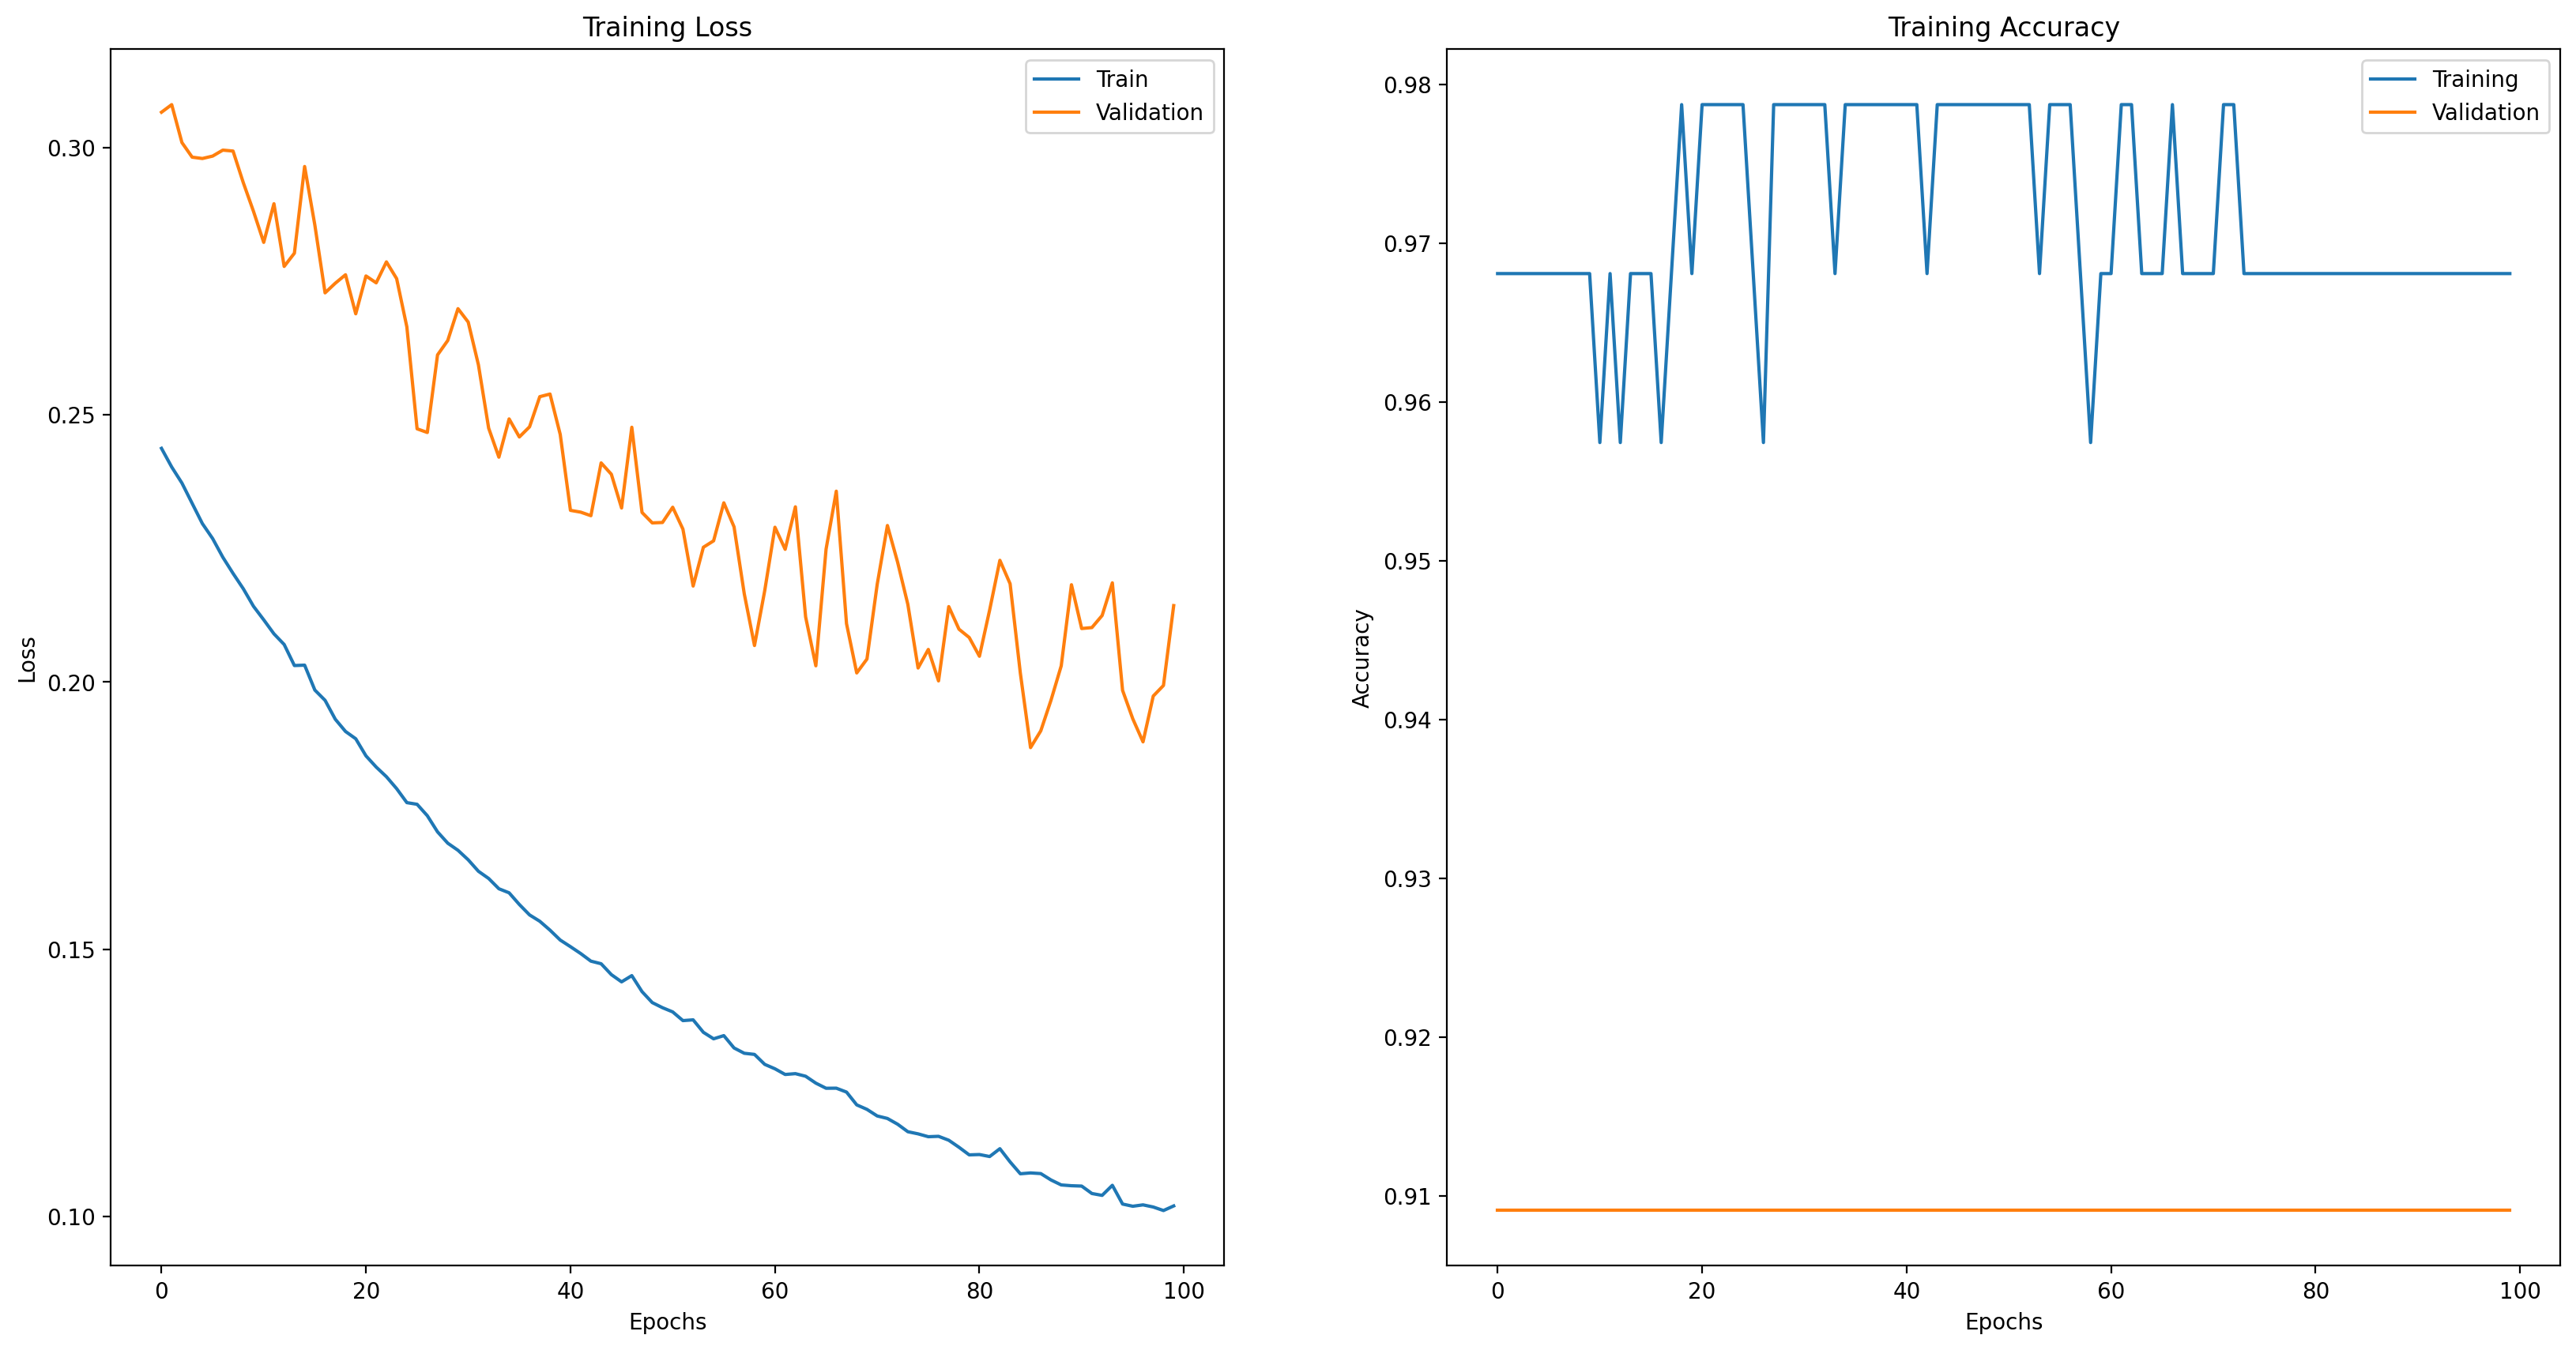

In [11]:
## plotting
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(tf_fit.history['loss'], label='Train')
ax[0].plot(tf_fit.history['val_loss'], label='Validation')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training Loss')
ax[0].legend()

ax[1].plot(tf_fit.history['accuracy'], label='Training')
ax[1].plot(tf_fit.history['val_accuracy'], label='Validation')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training Accuracy')
ax[1].legend();

In [12]:
## model evaluation
model.evaluate(X_test_t, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.1278 - accuracy: 0.9556


[0.12778304517269135, 0.9555555582046509]

In [13]:
## predict
model(X_test_t)

<tf.Tensor: shape=(45, 3), dtype=float32, numpy=
array([[0.00384186, 0.03694007, 0.95921814],
       [0.96212554, 0.03596128, 0.00191321],
       [0.9619221 , 0.03615871, 0.00191919],
       [0.0296    , 0.8096937 , 0.16070631],
       [0.03269557, 0.92357785, 0.04372659],
       [0.03582343, 0.9342583 , 0.02991825],
       [0.00358588, 0.03423572, 0.9621784 ],
       [0.02041359, 0.39638984, 0.58319664],
       [0.00402399, 0.03978905, 0.95618695],
       [0.96223986, 0.03585225, 0.00190799],
       [0.9624263 , 0.03567124, 0.00190249],
       [0.01497751, 0.22895178, 0.75607073],
       [0.9609053 , 0.03713477, 0.00195992],
       [0.04630407, 0.9309316 , 0.02276429],
       [0.96171993, 0.03635303, 0.00192701],
       [0.03044309, 0.7711246 , 0.1984323 ],
       [0.00347256, 0.03259557, 0.9639318 ],
       [0.03345125, 0.9287772 , 0.0377715 ],
       [0.03429141, 0.9317875 , 0.03392113],
       [0.00420113, 0.0417936 , 0.95400524],
       [0.00336055, 0.03128046, 0.96535903],
      